In [695]:
#import all the essential libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn import metrics

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import os

## Step 1: Data Understanding, Visualisation and Preparation:

In [696]:
df=pd.read_csv('train.csv')

In [697]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [698]:
df.shape

(1460, 81)

In [699]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [700]:
# We have to drop some columns which contains large number of null values and features not important for model
drop_variables = ['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature','MiscVal','3SsnPorch','PoolArea','Utilities']
df =df.drop(drop_variables, axis = 1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,12,2008,WD,Normal,250000


In [701]:
##checking shape after removing unwanted variables
df.shape

(1460, 71)

In [702]:
## checking data types of the variables
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object


In [703]:
df.LotFrontage = df.groupby('Neighborhood').LotFrontage.apply(lambda x: x.fillna(x.median()))

In [704]:
round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending = False)

GarageQual       5.55
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Foundation       0.00
ExterCond        0.00
ExterQual        0.00
YearBuilt        0.00
Exterior2nd      0.00
Exterior1st      0.00
RoofMatl         0.00
RoofStyle        0.00
YearRemodAdd     0.00
SalePrice        0.00
OverallCond      0.00
OverallQual      0.00
BsmtFinSF1       0.00
BldgType         0.00
Condition2       0.00
Condition1       0.00
Neighborhood     0.00
LandSlope        0.00
LotConfig        0.00
LandContour      0.00
LotShape         0.00
Street           0.00
LotArea          0.00
LotFrontage      0.00
MSZoning         0.00
HouseStyle       0.00
TotalBsmtSF      0.00
BsmtFinSF2       0.00
KitchenQual      0.00
SaleType         0.00
YrSold           0.00
MoSold           0.00
ScreenPorc

In [705]:
## according to data description NA can be replaced by No garage 
df['GarageType'] = df['GarageType'].replace(np.NaN, 'NoGarage')
df['GarageYrBlt'] = df['GarageYrBlt'].replace(np.NaN, 0.0)
df['GarageFinish'] = df['GarageFinish'].replace(np.NaN, 'NoGarage')
df['GarageCond'] = df['GarageCond'].replace(np.NaN, 'NoGarage')
df['GarageQual'] = df['GarageQual'].replace(np.NaN, 'NoGarage')

In [706]:
## checking null values again
round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending = False)

BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
SalePrice        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
Foundation       0.00
ExterQual        0.00
ExterCond        0.00
BsmtUnfSF        0.00
BsmtFinSF1       0.00
RoofStyle        0.00
YearRemodAdd     0.00
YearBuilt        0.00
LotConfig        0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
LandSlope        0.00
OverallCond      0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
BsmtFinSF2       0.00
TotalBsmtSF      0.00
SaleCondition    0.00
PavedDrive       0.00
GarageYrBlt      0.00
GarageFinish     0.00
GarageCars       0.00
GarageArea       0.00
GarageQual       0.00
GarageCond       0.00
WoodDeckSF

In [707]:
## similarly with basement columns
df['BsmtFinType2'] = df['BsmtFinType2'].replace(np.NaN, 'NoBasement')
df['BsmtExposure'] = df['BsmtExposure'].replace(np.NaN, 'NoBasement')
df['BsmtFinType1'] = df['BsmtFinType1'].replace(np.NaN, 'NoBasement')
df['BsmtCond'] = df['BsmtCond'].replace(np.NaN, 'NoBasement')
df['BsmtQual'] = df['BsmtQual'].replace(np.NaN, 'NoBasement')

In [708]:
## checking null values again
round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending = False)

MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
SalePrice        0.00
ExterCond        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
ExterQual        0.00
Foundation       0.00
BsmtUnfSF        0.00
BsmtQual         0.00
BsmtCond         0.00
BsmtExposure     0.00
BsmtFinType1     0.00
BsmtFinSF1       0.00
BsmtFinType2     0.00
RoofStyle        0.00
YearRemodAdd     0.00
YearBuilt        0.00
LotConfig        0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
LandSlope        0.00
OverallCond      0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
BsmtFinSF2       0.00
TotalBsmtSF      0.00
SaleCondition    0.00
PavedDrive       0.00
GarageYrBlt      0.00
GarageFinish     0.00
GarageCars       0.00
GarageArea       0.00
GarageQual       0.00
GarageCond       0.00
WoodDeckSF

In [709]:
df['MasVnrArea'] = df['MasVnrArea'].replace(np.NaN, 0.0)
df['MasVnrType'] = df['MasVnrType'].replace(np.NaN, 'None')

In [710]:
df['Electrical'].isnull().sum()

1

In [711]:
##since electrical has only one null value we can remove that row
df = df[~(pd.isnull(df['Electrical']))]


In [712]:
#again checking for null values
round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending = False)

SalePrice        0.0
ExterCond        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
Foundation       0.0
YearRemodAdd     0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
RoofStyle        0.0
YearBuilt        0.0
BsmtUnfSF        0.0
LotConfig        0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
LandSlope        0.0
OverallCond      0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
BsmtFinSF2       0.0
TotalBsmtSF      0.0
SaleCondition    0.0
PavedDrive       0.0
GarageYrBlt      0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
WoodDeckSF       0.0
Fireplaces       0.0
OpenPorchSF      0.0
EnclosedPorch

##### Null values have been eliminated

In [713]:
# Convert year related columns to number of years, to find how old the house is, or how many years ago that particular
# house was sold.
df['YearBuilt'] = 2020 - df['YearBuilt']
df['YearRemodAdd'] = 2020 - df['YearRemodAdd']
df['GarageYrBlt'] = 2020 - df['GarageYrBlt']
df['YrSold'] = 2020 - df['YrSold']

In [714]:
df.shape

(1459, 71)

In [715]:
## identifying numeric variables
numeric = df.select_dtypes(include=['float64','int64'])
numeric = numeric.columns

In [716]:
numeric

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

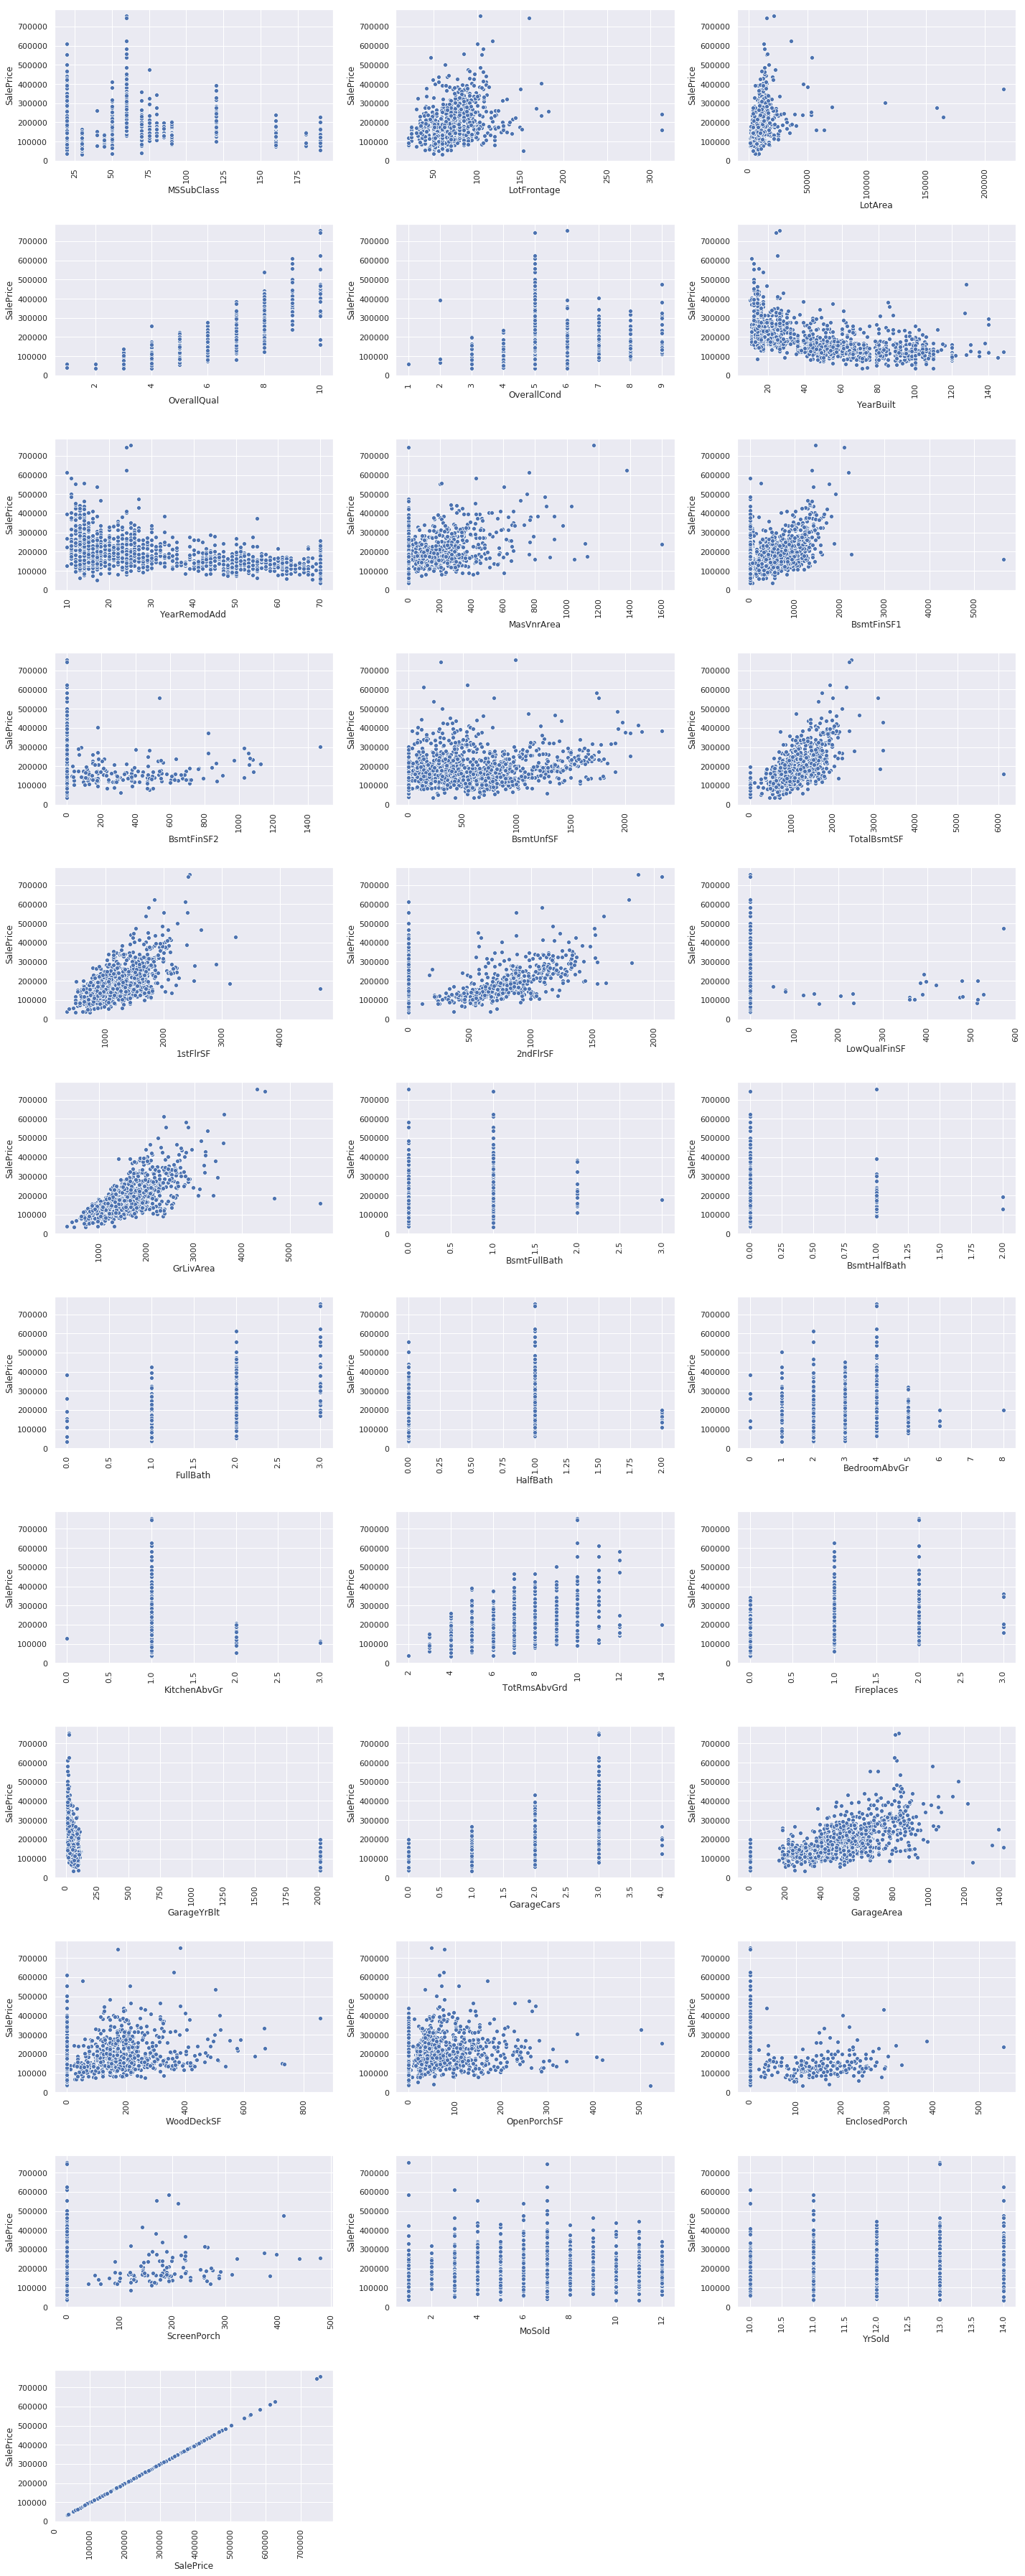

In [717]:
## making pairplots to identify trends 
plt.figure(figsize = (20,50))
i = 1
for x in numeric :
    plt.subplot(len(numeric)//3+1,3,i)
    sns.scatterplot(y='SalePrice',x=x,data=df)
    plt.xticks(rotation = 'vertical')
    i = i+1
plt.tight_layout()
plt.show()


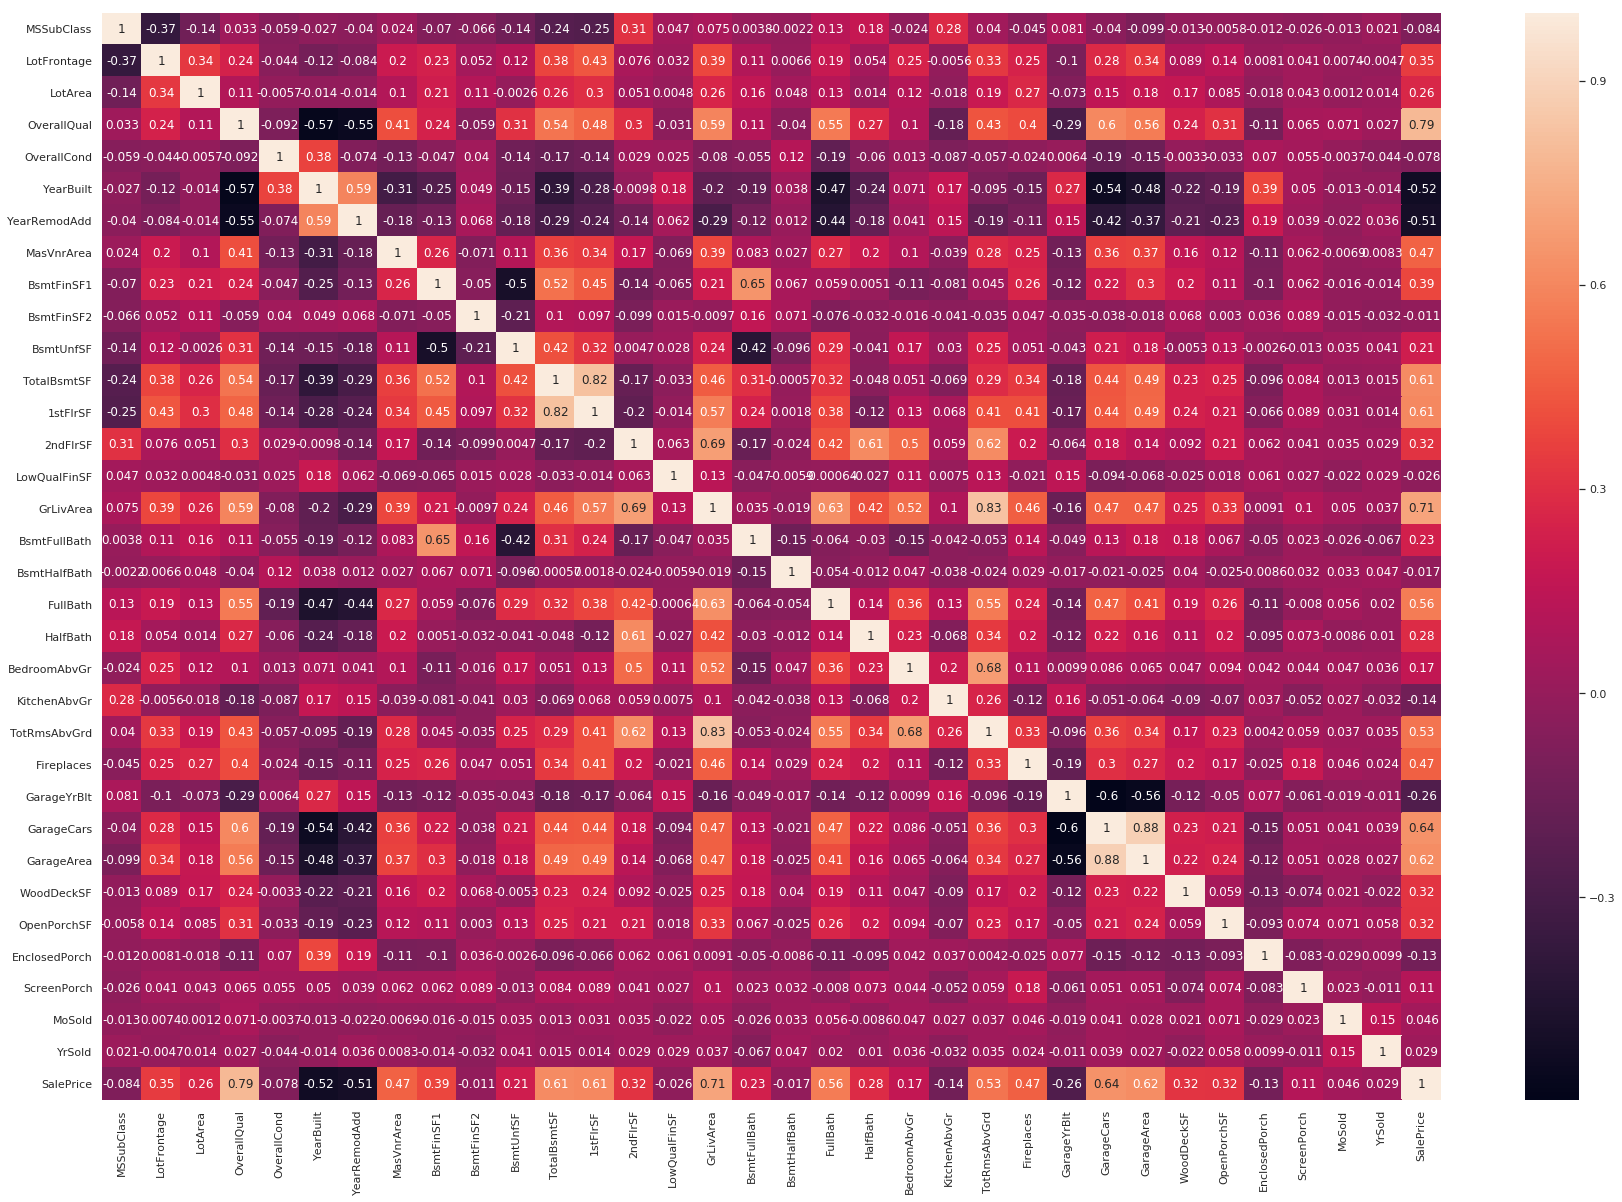

In [718]:
## finding out correlation between variable and correlation wrt to target variable
plt.figure(figsize = (30, 20))
sns.heatmap(df[numeric].corr(),annot = True)
plt.show()

- Variables that are highly correlated with Sale Price are : OverallQual,GrLivArea, GarageArea, TotBsmtSF, 1stFlrSF,TotalRmsAbvGrd,FullBath and YearBuilt
- GarageArea and GarageCars are highly correlated with a correlation of 0.88
- TotRmsAbvGrd and GrLivArea are correlated to each other with a correlation of 0.83
- 1stFlrSF and TotalBsmtSF are highly correlated with a correlation of 0.82

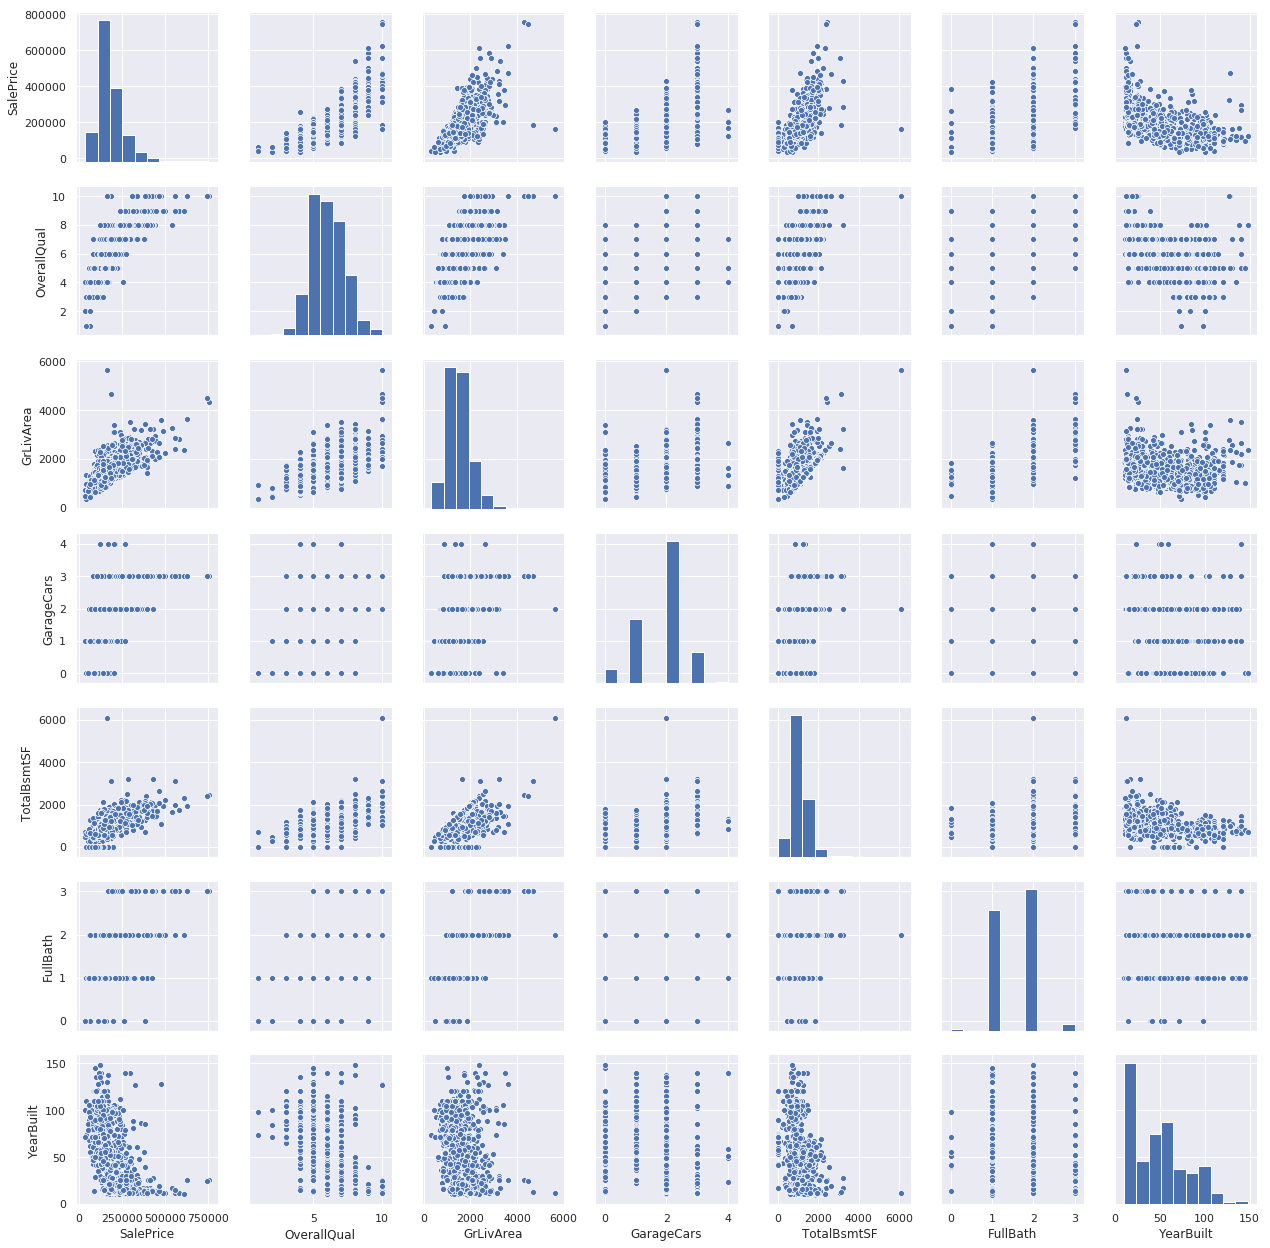

In [719]:
columns=['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[columns])
plt.show()

In [720]:
### Visualizing categorical variables

In [721]:
##identifying categorical variables
categorical = df.select_dtypes(include=['object'])
categorical = categorical.columns

In [722]:
categorical

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

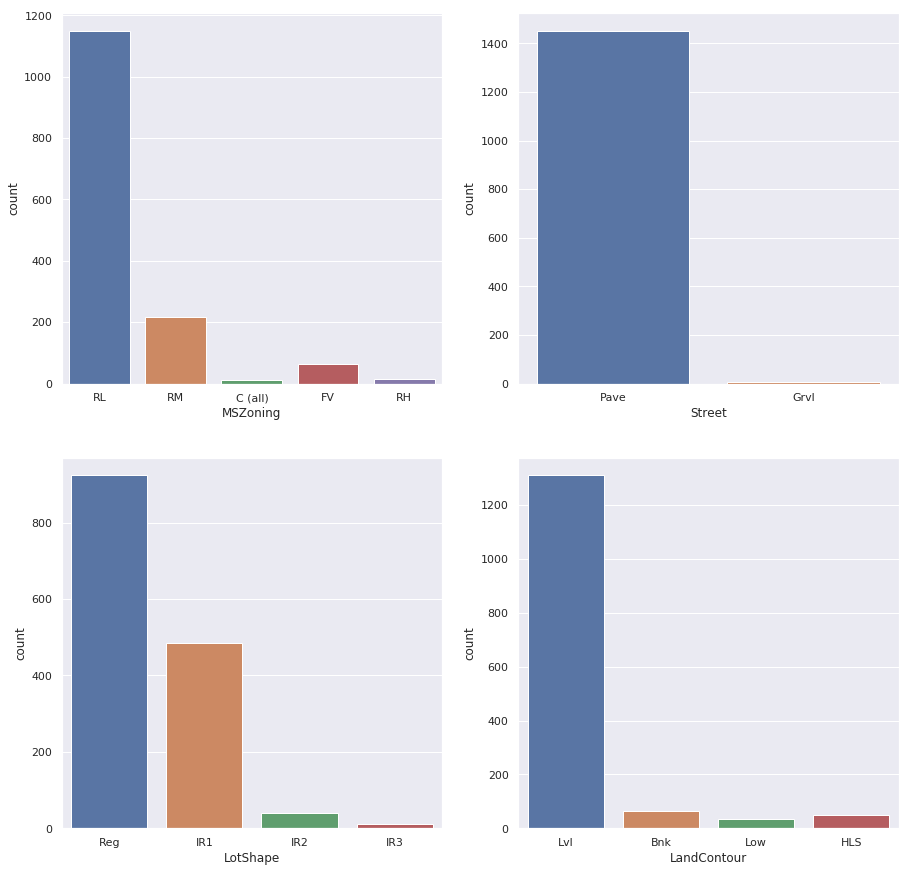

In [723]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='MSZoning', data=df)
plt.subplot(222)
sns.countplot(x='Street', data=df)
plt.subplot(223)
sns.countplot(x='LotShape', data=df)
plt.subplot(224)
sns.countplot(x='LandContour', data=df)


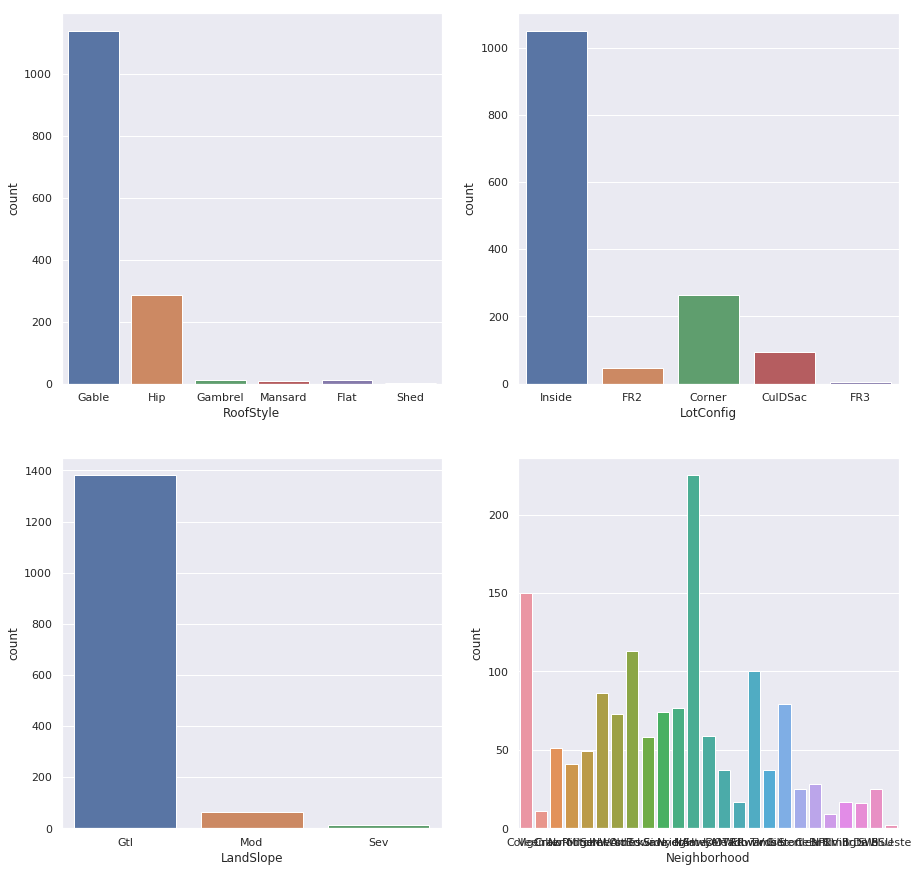

In [724]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='RoofStyle', data=df)
plt.subplot(222)
sns.countplot(x='LotConfig', data=df)
plt.subplot(223)
sns.countplot(x='LandSlope', data=df)
plt.subplot(224)
sns.countplot(x='Neighborhood', data=df)

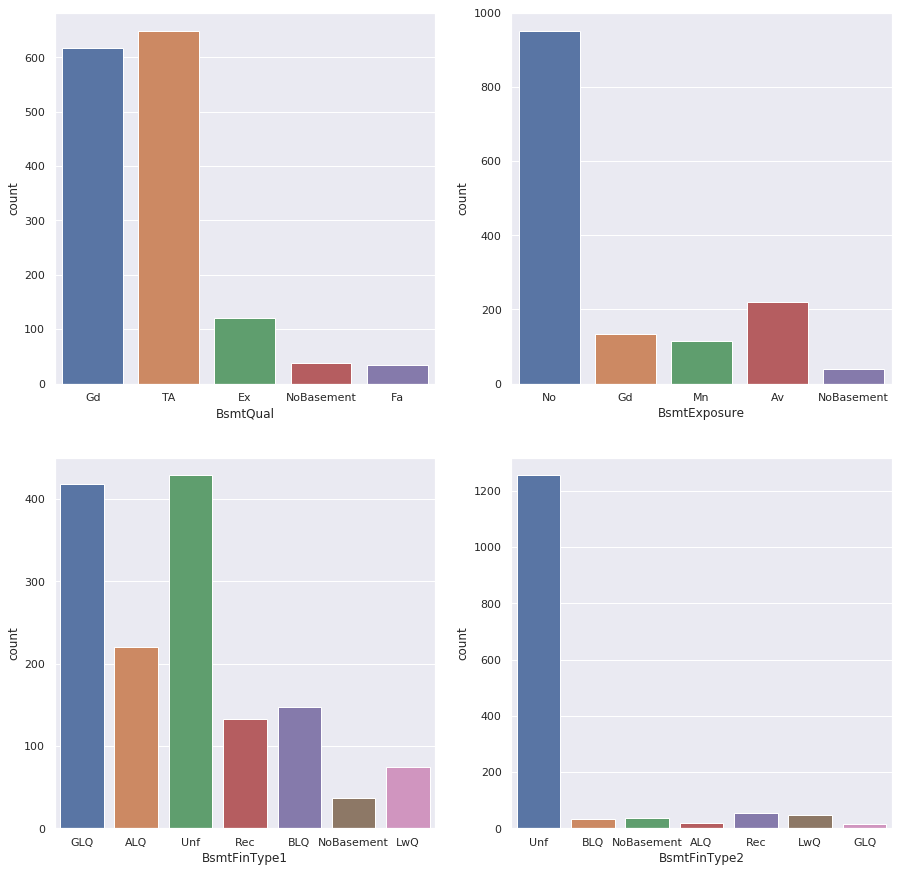

In [725]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='BsmtQual', data=df)
plt.subplot(222)
sns.countplot(x='BsmtExposure', data=df)
plt.subplot(223)
sns.countplot(x='BsmtFinType1', data=df)
plt.subplot(224)
sns.countplot(x= 'BsmtFinType2', data=df) 

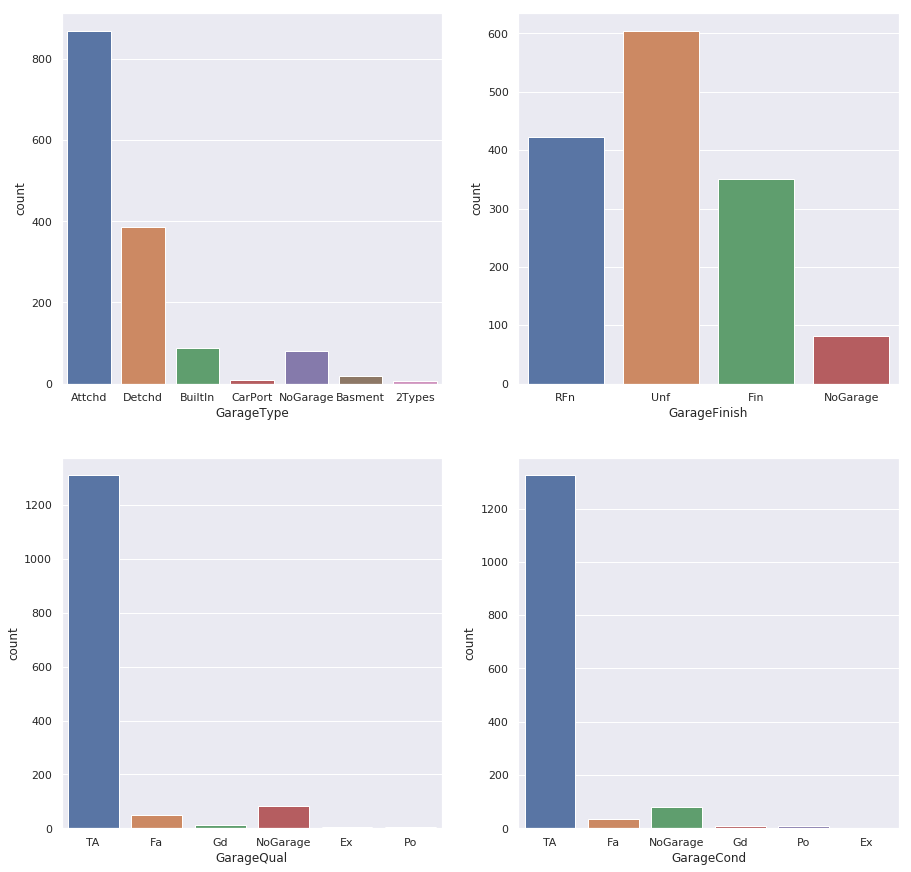

In [726]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='GarageType', data=df)
plt.subplot(222)
sns.countplot(x='GarageFinish', data=df)
plt.subplot(223)
sns.countplot(x='GarageQual', data=df)
plt.subplot(224)
sns.countplot(x='GarageCond', data=df)

## Data Preparation

- encoding of variables (dummy variables)
- train - test split
- feature scaling

In [727]:
y=df.pop('SalePrice')
X=df

In [728]:
housing_cat = X.select_dtypes(include=['object'])
housing_cat.head()

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [729]:
## creating dummy variables for categorical variables
housing_dum = pd.get_dummies(housing_cat, drop_first=True)
housing_dum.head()


,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBasement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NoBasement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBasement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBasement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBasement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NoGarage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

In [730]:
X = pd.concat([X, housing_dum], axis=1)

In [731]:
X.shape

(1459, 274)

In [732]:
X = X.drop(categorical, axis = 1)
X.shape

(1459, 237)

### Step 2 : Feature Scaling

In [733]:
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

/home/anushka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=237)

### Step 3: Train - Test Split 

In [734]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

### Step 4 : Model Evaluation 

### Model 1 : Multiple Linear Regression using RFE

In [735]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [736]:
# running RFE and taking top 20 feature for our model building:
rfe = RFE(lm,20)            
rfe = rfe.fit(X_train, y_train)

In [737]:
# Ranking of the column by RFE for feature importance:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 212),
 ('LotFrontage', False, 67),
 ('LotArea', False, 41),
 ('OverallQual', False, 18),
 ('OverallCond', False, 33),
 ('YearBuilt', False, 29),
 ('YearRemodAdd', False, 52),
 ('MasVnrArea', False, 59),
 ('BsmtFinSF1', False, 15),
 ('BsmtFinSF2', False, 17),
 ('BsmtUnfSF', False, 16),
 ('TotalBsmtSF', False, 14),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', False, 8),
 ('LowQualFinSF', False, 12),
 ('GrLivArea', False, 9),
 ('BsmtFullBath', False, 104),
 ('BsmtHalfBath', False, 202),
 ('FullBath', False, 106),
 ('HalfBath', False, 123),
 ('BedroomAbvGr', False, 46),
 ('KitchenAbvGr', False, 31),
 ('TotRmsAbvGrd', False, 103),
 ('Fireplaces', False, 98),
 ('GarageYrBlt', False, 44),
 ('GarageCars', False, 57),
 ('GarageArea', False, 35),
 ('WoodDeckSF', False, 148),
 ('OpenPorchSF', False, 191),
 ('EnclosedPorch', False, 218),
 ('ScreenPorch', False, 149),
 ('MoSold', False, 121),
 ('YrSold', False, 166),
 ('MSZoning_FV', False, 48),
 ('MSZoning_RH', False, 56),
 ('MSZon

In [738]:
# Columns significant according to RFE:
col = X_train.columns[rfe.support_]
col

Index(['1stFlrSF', 'Condition2_PosA', 'Exterior1st_CBlock', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_TA', 'BsmtQual_NoBasement', 'BsmtCond_NoBasement', 'BsmtExposure_NoBasement', 'BsmtFinType1_NoBasement', 'GarageType_NoGarage', 'GarageFinish_NoGarage', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_NoGarage', 'GarageCond_Gd', 'GarageCond_NoGarage', 'GarageCond_TA', 'SaleType_New', 'SaleCondition_Partial'], dtype='object')

### Model 2 : Ridge Model

In [739]:
X_train_final = X_train[col]

In [740]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 
                    5.0, 6.0, 7.0, 8.0, 9.0, 10.0,20, 50, 100, 500, 1000]}
ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_final, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [741]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 20}
-43327.92313894432


In [742]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=20]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008279,0.001754,0.002638,0.000111,0.0001,{'alpha': 0.0001},-43580.378321,-44241.063949,-41814.083809,-42004.857051,-45082.851746,-43344.877858,1265.746243,25,-42307.455890,-42503.698616,-42881.210837,-42931.261164,-42169.837001,-42558.692702,303.373779
1,0.009411,0.000457,0.002714,0.000018,0.001,{'alpha': 0.001},-43580.381570,-44241.062350,-41814.086485,-42004.848343,-45082.850876,-43344.876812,1265.747095,24,-42307.456648,-42503.699556,-42881.210697,-42931.259411,-42169.837641,-42558.692791,303.372995
2,0.009649,0.002052,0.002971,0.000273,0.01,{'alpha': 0.01},-43580.414059,-44241.046366,-41814.113242,-42004.761259,-45082.842172,-43344.866349,1265.755616,23,-42307.464229,-42503.708956,-42881.209302,-42931.241886,-42169.844036,-42558.693682,303.365158
3,0.007601,0.000060,0.003318,0.000085,0.05,{'alpha': 0.05},-43580.558456,-44240.975348,-41814.232157,-42004.374244,-45082.803495,-43344.819856,1265.793503,22,-42307.497921,-42503.750732,-42881.203099,-42931.164001,-42169.872455,-42558.697642,303.330331
4,0.007651,0.000086,0.003352,0.000171,0.1,{'alpha': 0.1},-43580.738953,-44240.886627,-41814.380786,-42003.890530,-45082.755171,-43344.761763,1265.840905,21,-42307.540039,-42503.802946,-42881.195347,-42931.066658,-42169.907972,-42558.702593,303.286805


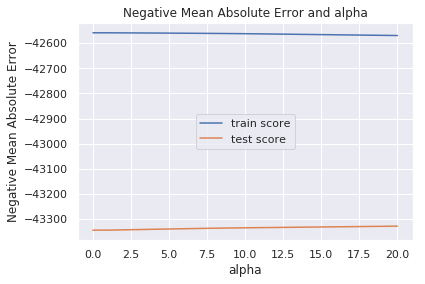

In [743]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')


plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='center')
plt.show()

In [744]:
# Ridge regression:
ridge = Ridge(alpha=20)
ridge.fit(X_train, y_train)

# predict
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9229849258548308
0.8822898136843226


In [745]:
ridge.coef_


array([-3.06154819e+03, -5.28225990e+02,  5.49344593e+03,  1.02717830e+04,
        5.60833084e+03, -4.28178742e+03, -2.24537608e+03,  3.72644307e+03,
        3.67777490e+03,  1.20381929e+03, -4.26652654e+02,  3.83839465e+03,
        6.00701854e+03,  1.41560633e+04, -4.92059894e+02,  1.61302864e+04,
        3.30657630e+03,  3.29755666e+02,  3.97439018e+03,  3.54505428e+02,
       -2.67483994e+03, -3.76297630e+03,  2.93182268e+03,  2.21070579e+03,
        1.05989752e+03,  7.36898983e+03,  6.44848768e+02,  8.65670030e+02,
       -4.00473851e+02,  5.08478532e+02,  1.00829685e+03, -1.02001510e+03,
        8.11531627e+02,  4.31893943e+03,  1.69778014e+03,  5.56614522e+03,
        3.93622059e+03,  2.25043285e+03,  3.77729813e+02, -2.24859781e+03,
        6.38722038e+02,  3.65565926e+03,  1.47647887e+03,  4.00830096e+03,
        1.88944305e+03, -1.87032512e+03, -1.89181103e+03, -7.85744718e+02,
       -4.74425733e+01, -1.40317430e+03,  3.28173157e+01, -1.23397855e+02,
       -3.24658432e+02, -

In [772]:
ridge_params = list(ridge.coef_)
ridge_params.insert(0,ridge.intercept_)
cols = X_train.columns
ridge_coef = pd.DataFrame(list(zip(cols,ridge_params)))
ridge_coef.columns = ['Features','Coefficients']
ridge_coef.sort_values(by='Coefficients',ascending=False).head(11)

,Features,Coefficients
0,MSSubClass,181411.206702
106,RoofMatl_Membran,32950.148097
110,RoofMatl_WdShake,20526.116064
112,Exterior1st_AsphShn,20242.165814
16,BsmtFullBath,16130.286373
14,LowQualFinSF,14156.063329
111,RoofMatl_WdShngl,13189.010145
4,OverallCond,10271.783037
65,Neighborhood_NridgHt,7845.637755
66,Neighborhood_OldTown,7471.212459


In [773]:
ridge_coef.sort_values(by='Coefficients',ascending=False).tail(11)

,Features,Coefficients
22,TotRmsAbvGrd,-3762.976301
98,HouseStyle_SFoyer,-3817.278965
57,Neighborhood_Gilbert,-3924.506665
6,YearRemodAdd,-4281.787424
146,ExterQual_TA,-5732.976918
147,ExterCond_Fa,-6360.279844
86,Condition2_RRAe,-7316.747074
160,BsmtCond_Gd,-10032.807993
197,Functional_Maj2,-10761.806750
158,BsmtQual_NoBasement,-11536.460950


##### the above features are top predictors according to Ridge

### Step 3 : Model using Lasso

In [748]:
X_train_lasso = X_train[col]

In [761]:
folds = 10

params = {'alpha': [0.0001, 0.001,0.002,0.003,0.005,0.008]}

model_x = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_x.fit(X_train_lasso, y_train)


Fitting 30 folds for each of 6 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/anushka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anushka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anushka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anushka/anaconda3/lib/python3.7/site-packages/skl

/home/anushka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anushka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anushka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anushka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did no

/home/anushka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anushka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anushka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anushka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did no

/home/anushka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anushka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anushka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anushka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did no

/home/anushka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anushka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anushka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anushka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did no

/home/anushka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anushka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anushka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/anushka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did no

GridSearchCV(cv=30, error_score='raise-deprecating',
       estimator=Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.002, 0.003, 0.005, 0.008]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [762]:
print(model_x.best_params_)
print(model_x.best_score_)

{'alpha': 0.0001}
-43179.58731807964


In [763]:
cv_results = pd.DataFrame(model_x.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,split12_test_score,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,split20_test_score,split21_test_score,split22_test_score,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,split10_train_score,split11_train_score,split12_train_score,split13_train_score,split14_train_score,split15_train_score,split16_train_score,split17_train_score,split18_train_score,split19_train_score,split20_train_score,split21_train_score,split22_train_score,split23_train_score,split24_train_score,split25_train_score,split26_train_score,split27_train_score,split28_train_score,split29_train_score,mean_train_score,std_train_score
0,0.049441,0.028522,0.002668,0.004659,0.0001,{'alpha': 0.0001},-55914.291876,-36888.832558,-43631.740680,-43462.304739,-39145.551373,-40851.210474,-52153.399201,-44436.789094,-38809.088933,-38378.938952,-46103.021673,-42274.835649,-44600.804127,-42954.765711,-39923.255789,-30206.412723,-40038.827275,-55093.031122,-31496.810039,-34834.629060,-59295.128545,-33735.855174,-51003.925967,-40107.362951,-60532.009672,-39332.491985,-40580.719818,-37995.534367,-43109.156360,-48122.343519,-43179.587318,7511.946092,1,-42014.046486,-42790.493608,-42599.723495,-42547.715840,-42679.672086,-42586.520537,-42294.825133,-42561.202734,-42718.274330,-42726.866618,-42513.207144,-42576.931740,-42534.965137,-42592.835814,-42715.790007,-43015.149365,-42725.248027,-42057.155177,-42937.612120,-42789.201947,-42260.192677,-42856.553372,-42226.785985,-42675.547698,-42011.252824,-42691.916838,-42651.301975,-42775.457169,-42611.046447,-42341.390215,-42569.296085,253.334790
1,0.087681,0.028868,0.004450,0.004717,0.001,{'alpha': 0.001},-55914.291272,-36888.829299,-43631.740199,-43462.305838,-39145.551816,-40851.210410,-52153.398829,-44436.788311,-38809.089731,-38378.938721,-46103.021126,-42274.861907,-44600.803906,-42954.765297,-39923.254024,-30206.414700,-40038.827846,-55093.030978,-31496.809573,-34834.629068,-59295.129061,-33735.853795,-51003.924949,-40107.363191,-60532.009573,-39332.492681,-40580.720456,-37995.534721,-43109.155315,-48122.343329,-43179.588001,7511.945935,2,-42014.046522,-42790.493638,-42599.723534,-42547.715890,-42679.672157,-42586.520581,-42294.825139,-42561.202815,-42718.274329,-42726.866640,-42513.207173,-42576.931721,-42534.965197,-42592.835870,-42715.790067,-43015.149386,-42725.248089,-42057.155213,-42937.612137,-42789.201962,-42260.192669,-42856.553427,-42226.786055,-42675.547784,-42011.252904,-42691.916901,-42651.302035,-42775.457215,-42611.046555,-42341.390271,-42569.296129,253.334788
2,0.069785,0.018844,0.003308,0.003516,0.002,{'alpha': 0.002},-55914.290601,-36888.825677,-43631.739665,-43462.307059,-39145.552308,-40851.210339,-52153.398416,-44436.787442,-38809.090619,-38378.938464,-46103.020518,-42274.891083,-44600.803661,-42954.764836,-39923.252064,-30206.416897,-40038.828479,-55093.030819,-31496.809056,-34834.629077,-59295.129635,-33735.852264,-51003.923818,-40107.363458,-60532.009463,-39332.490541,-40580.721164,-37995.535115,-43109.154153,-48122.343118,-43179.588662,7511.945811,3,-42014.046562,-42790.493671,-42599.723578,-42547.715946,-42679.672235,-42586.520629,-42294.825146,-42561.202905,-42718.274329,-42726.866665,-42513.207206,-42576.931699,-42534.965264,-42592.835932,-42715.790134,-43015.149409,-42725.248158,-42057.155252,-42937.612156,-42789.

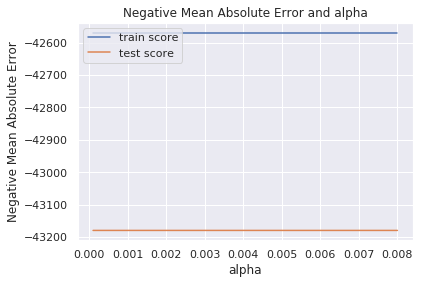

In [764]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')


plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()


In [769]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lasso, y_train)

/home/anushka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [770]:
(lasso.coef_)

array([ 4.13326487e+04,  2.25995618e+03, -1.16330305e+03, -4.38255817e+03,
       -3.07282762e+03,  7.09613800e+01, -1.00735128e+04, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -5.77370772e+03, -0.00000000e+00,
       -5.97223493e+03,  1.61593989e+03, -2.54210369e+02,  9.13385583e+02,
        1.63863209e+01,  5.26902754e+03,  1.51424371e+04,  0.00000000e+00])

In [771]:
Y_train_lasso = y_train.copy()
model_lasso=lasso.fit(X_train_lasso, Y_train_lasso)

y_train_pred = lasso.predict(X_train_lasso)
print(model_lasso.score(X_train_lasso, Y_train_lasso))
print(metrics.r2_score(y_true=Y_train_lasso, y_pred=y_train_pred))

0.46196711137032304
0.461967111370323


/home/anushka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [774]:
lasso_df = pd.DataFrame() 
lasso_df['Coeff Values'] = pd.Series(lasso.coef_) 
lasso_df['Variables'] = X_train_lasso.columns

lasso_df = lasso_df.loc[lasso_df['Coeff Values']!=0]

lasso_df['Absolute Coefficent'] =lasso_df['Coeff Values'].apply(lambda x:abs(x))
lasso_df.sort_values(by=['Absolute Coefficent'],inplace=True,ascending=False)

lasso_df.head(20)


,Coeff Values,Variables,Absolute Coefficent
0,41332.648666,1stFlrSF,41332.648666
18,15142.437069,SaleType_New,15142.437069
6,-10073.512763,BsmtQual_NoBasement,10073.512763
12,-5972.234930,GarageQual_Fa,5972.234930
10,-5773.707718,GarageType_NoGarage,5773.707718
17,5269.027537,GarageCond_TA,5269.027537
3,-4382.558167,ExterCond_Fa,4382.558167
4,-3072.827622,ExterCond_Gd,3072.827622
1,2259.956182,Condition2_PosA,2259.956182
13,1615.939892,GarageQual_Gd,1615.939892


### these are the variables selected by lasso